### (B) Is there a significant difference between political preferences of the voters depending on their demographic attributes recorded in the survey (that is, age, gender, education level…)?

In [13]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'private_dataF.xlsx'  # Update this path if necessary
df = pd.read_excel(file_path, engine='openpyxl')

# Calculate age from dob
df['age'] = df['dob'].apply(lambda x: datetime.now().year - x.year)

# Create age categories
def categorize_age(age):
    if age < 30:
        return 'Under 30'
    elif 30 <= age <= 50:
        return '30-50'
    elif 50 < age <= 70:
        return '50-70'
    else:
        return '70+'

df['age_category'] = df['age'].apply(categorize_age)

df['original_zip'] = df['zip']

# Function to convert categorical data to numeric
def encode_categories(column):
    return pd.Categorical(df[column]).codes

# Encode categorical variables for statistical analysis
df['sex_encoded'] = encode_categories('sex')
df['party_encoded'] = encode_categories('party')
df['marital_status_encoded'] = encode_categories('marital_status')
df['education_encoded'] = encode_categories('education')
df['citizenship_encoded'] = encode_categories('citizenship')
df['age_category_encoded'] = encode_categories('age_category')
df['zip'] = encode_categories('zip')

# ---- Chi-Square Tests for Categorical Variables ----
# Gender vs. Party Preference
contingency_table_sex_party = pd.crosstab(df['sex'], df['party'])
chi2_sex, p_value_sex_party, _, _ = chi2_contingency(contingency_table_sex_party)

# Marital Status vs. Party Preference
contingency_table_marital_party = pd.crosstab(df['marital_status'], df['party'])
chi2_marital, p_value_marital_party, _, _ = chi2_contingency(contingency_table_marital_party)

# Citizenship vs. Party Preference
contingency_table_citizenship_party = pd.crosstab(df['citizenship'], df['party'])
chi2_citizenship, p_value_citizenship_party, _, _ = chi2_contingency(contingency_table_citizenship_party)

# Education vs. Party Preference
contingency_table_education_party = pd.crosstab(df['education'], df['party'])
chi2_education, p_value_education_party, _, _ = chi2_contingency(contingency_table_education_party)

# Age Category vs. Party Preference
contingency_table_age_party = pd.crosstab(df['age_category'], df['party'])
chi2_age, p_value_age_party, _, _ = chi2_contingency(contingency_table_age_party)

# Zip vs. Party Preference
contingency_table_zip_party = pd.crosstab(df['zip'], df['party'])
chi2_zip, p_value_zip_party, _, _ = chi2_contingency(contingency_table_zip_party)

# ---- Display Results ----
print("Chi-Square Test Results:")
print(f"Gender vs. Party Preference: Chi2 = {chi2_sex}, p-value = {p_value_sex_party}")
print(f"Marital Status vs. Party Preference: Chi2 = {chi2_marital}, p-value = {p_value_marital_party}")
print(f"Citizenship vs. Party Preference: Chi2 = {chi2_citizenship}, p-value = {p_value_citizenship_party}")
print(f"Education vs. Party Preference: Chi2 = {chi2_education}, p-value = {p_value_education_party}")
print(f"Age Category vs. Party Preference: Chi2 = {chi2_age}, p-value = {p_value_age_party}")
print(f"Zip vs. Party Preference: Chi2 = {chi2_zip}, p-value = {p_value_zip_party}")


Chi-Square Test Results:
Gender vs. Party Preference: Chi2 = 4.702858345536047, p-value = 0.09523296055703562
Marital Status vs. Party Preference: Chi2 = 23.89640077398484, p-value = 0.0005456749643257719
Citizenship vs. Party Preference: Chi2 = 64.66825080677692, p-value = 8.400696920671983e-08
Education vs. Party Preference: Chi2 = 48.004292458163725, p-value = 1.312417235620471e-05
Age Category vs. Party Preference: Chi2 = 22.91253604510735, p-value = 0.0008263080086797844
Zip vs. Party Preference: Chi2 = 12.32451656218133, p-value = 0.055108659854007806


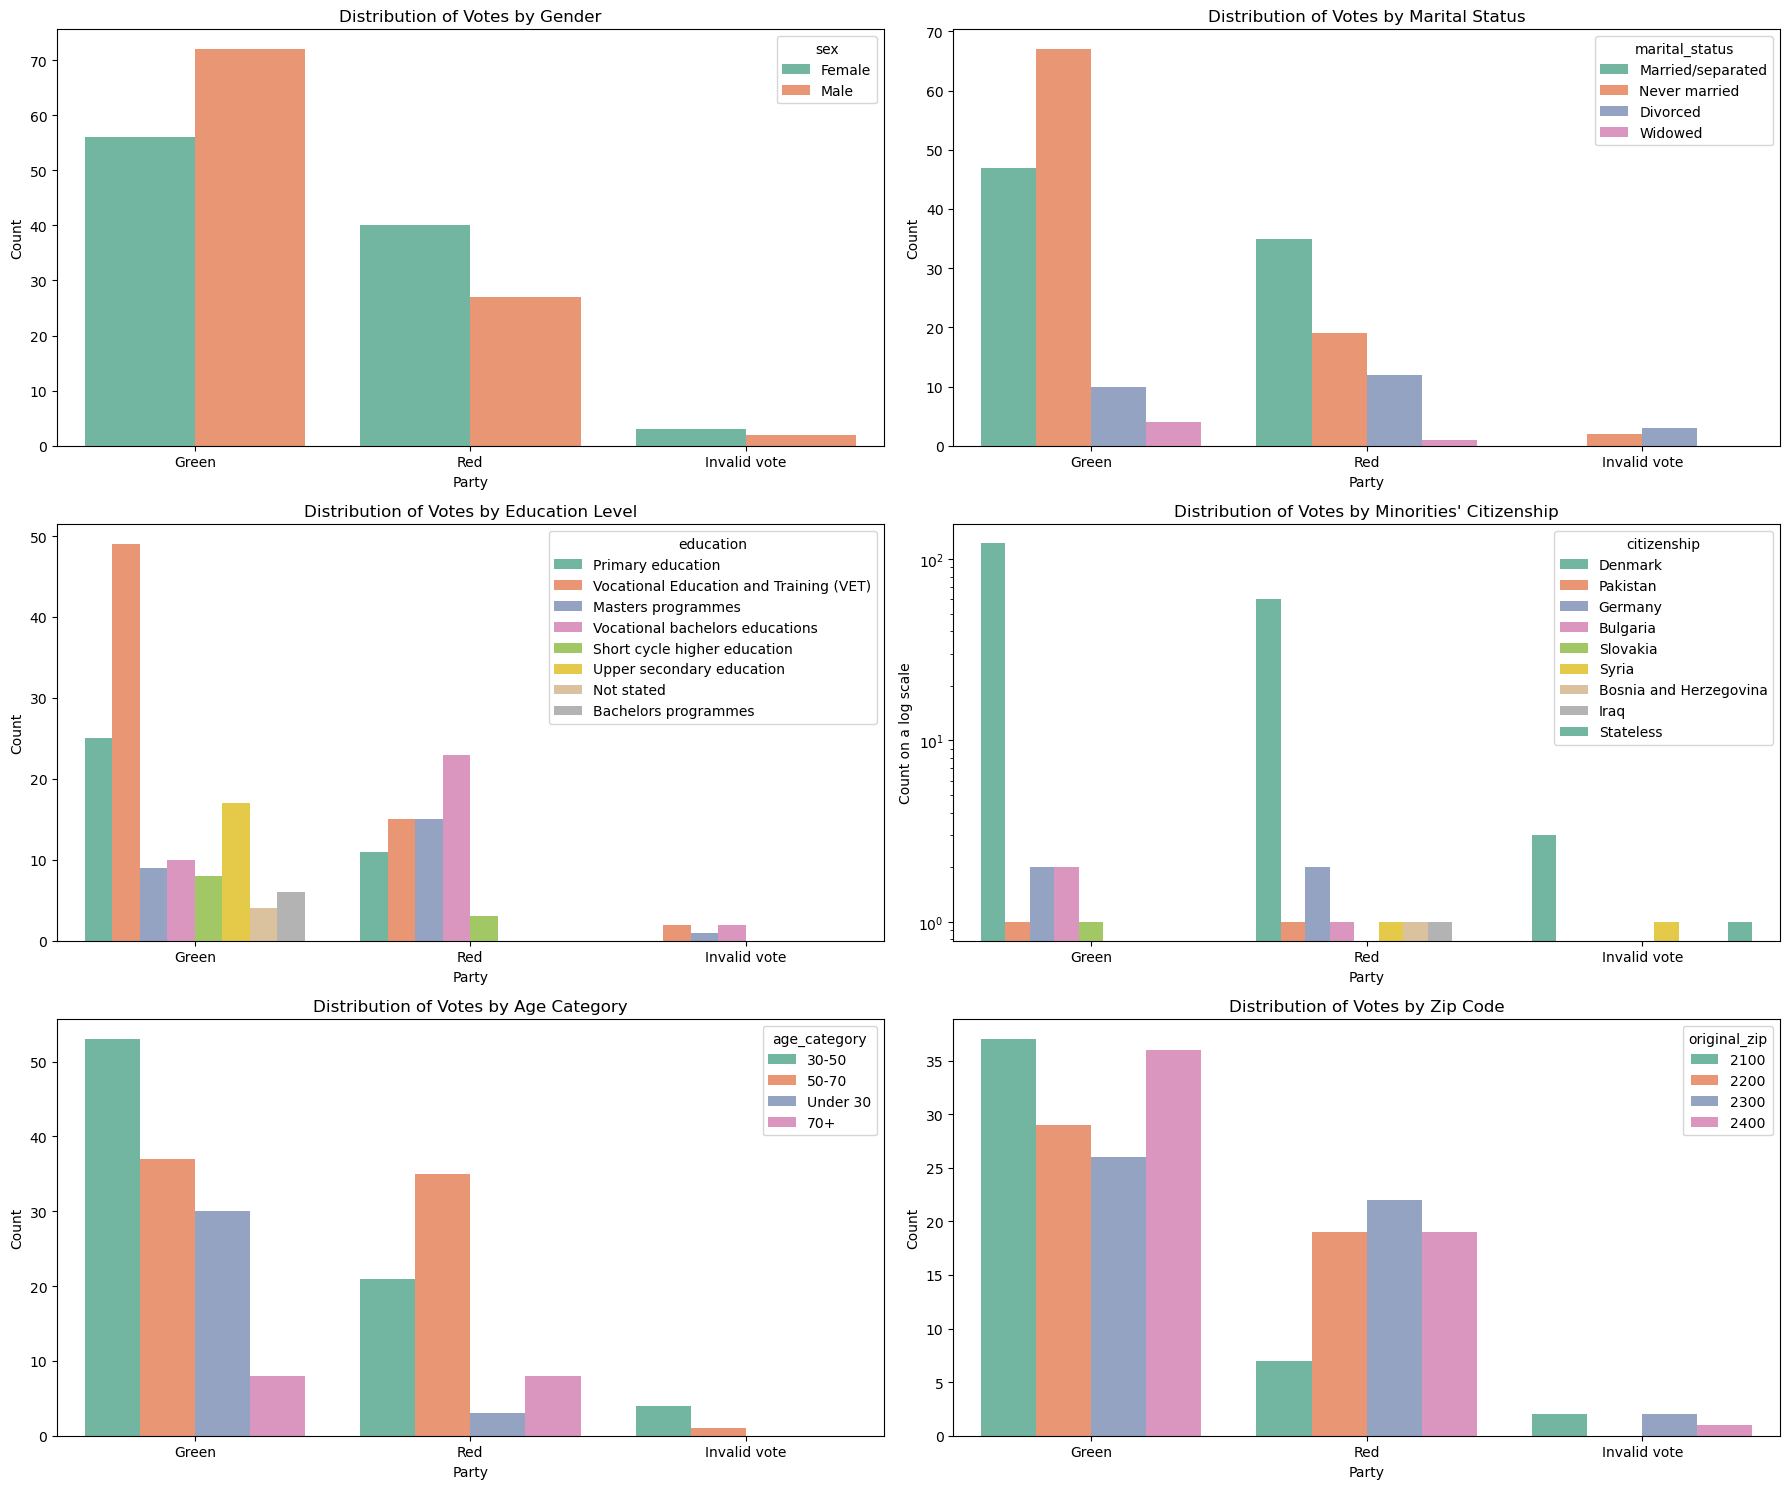

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = sns.color_palette("Set2")

# Create a figure and a set of subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 15))  # 2x2 grid of subplots

# Plot: Distribution of Votes by Sex
sns.countplot(x='party', hue='sex', data=df, palette=custom_palette, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Votes by Gender')
axes[0, 0].set_xlabel('Party')
axes[0, 0].set_ylabel('Count')

# Plot: Distribution of Votes by Marital Status
sns.countplot(x='party', hue='marital_status', data=df, palette=custom_palette, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Votes by Marital Status')
axes[0, 1].set_xlabel('Party')
axes[0, 1].set_ylabel('Count')

# Plot: Distribution of Votes by Education Level
sns.countplot(x='party', hue='education', data=df, palette=custom_palette, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Votes by Education Level')
axes[1, 0].set_xlabel('Party')
axes[1, 0].set_ylabel('Count')

# Plot: Distribution of Votes by Citizenship
sns.countplot(x='party', hue='citizenship', data=df, palette=custom_palette, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Votes by Minorities\' Citizenship')
axes[1, 1].set_xlabel('Party')
axes[1, 1].set_ylabel('Count on a log scale')
axes[1, 1].set_yscale('log')

# Plot: Distribution of Votes by Age Category
sns.countplot(x='party', hue='age_category', data=df, palette=custom_palette, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Votes by Age Category')
axes[2, 0].set_xlabel('Party')
axes[2, 0].set_ylabel('Count')

# Plot: Distribution of Votes by Zip Code
sns.countplot(x='party', hue='original_zip', data=df, palette=custom_palette, ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Votes by Zip Code')
axes[2, 1].set_xlabel('Party')
axes[2, 1].set_ylabel('Count')

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()
